# 📊 Analytics - Camada RAW (Bronze)

## análise exploratória de dados - Dados de Aviação (1948-10-24 - 2022-12-29)

** Objetivo **: Explorar os dados brutos de relativos aos acidentes de avião e gerar Dashboards que possibilitem a compreensão destes eventos.

## 📋 Índice

1. Bibliotecas utilizadas;
2. Carregamento dos Dados;
3. Visão Geral dos Dados;
4. Análise de Qualidade;
5. Análise Temporal;
6. Análise de Serveridade;
7. Análise Geográfica;
8. Análise de Aeronaves;
9. Análise de Fases de Voo;
10. Conclusões.


missões:
- falar oque é categoria, e oque é fato
- colocar um texto explicando a análise pra cada gráfico
- colocar boxplot
- colocar histograma
- colocar gráfico de linhas
- gráfico de área


# Importação de Bibliotecas 
## Bibliotecas que serão usadas na análise dos dados de acidentes aéreos;

- O Pandas será utilizado para manipular dados em tabelas;
- O Numpy será utilizado para operações matemáticas;
- O Matplotlib e o Seaborn serão utilizado para criação de gráficos;

In [2]:
import pandas as pd

pd.set_option('display.max_rows', 100)      # Mostra até 100 linhas quando você imprime um DataFrame.
pd.set_option('display.max_columns', None)  # Mostra todas as colunas (não corta nenhuma).
pd.set_option('display.width', None)        # Ajusta automaticamente a largura da saída no terminal/notebook.
pd.set_option('display.precision', 2)       # Mostra números decimais com 2 casas decimais.


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore') # Ignora Warnings
sns.set_style('whitegrid') # Define o estilo padrão do seaborn como 'whitegrid'
plt.rcParams['figure.figsize'] = (12, 6) # padroniza as figuras em 12x6

print("Êxito na importação das Bibliotecas!")

Êxito na importação das Bibliotecas!


# CARREGAR DADOS
Nesta etapa os dados brutos no csv serão carregados como um dataframe para facilitar a manipulação.

In [3]:
df_raw = pd.read_csv('dados_brutos.csv', encoding = 'cp1252', low_memory=False) # cp1252 = tabela de simbolos do windows, low_memory=False para processar tipos de dados só no final

print(f"Dados carregados com sucesso!")
print(f"Total de registros: {len(df_raw):,}")
print(f"Total de colunas: {len(df_raw.columns)}")
print(f"Tamanho em memória: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dados carregados com sucesso!
Total de registros: 88,889
Total de colunas: 31
Tamanho em memória: 122.12 MB


Com a célula a seguir podemos visualizar a quantidade de registros (88889) e um total de 31 colunas

In [4]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# Estatísticas Descritivas

Identificar as estatísticas básicas(média, mediana, mín, max) de colunas numérias:
top - moda
freq - quantidade de vezes que moda aparece
count - quantidade de valores não nulos
mean - média
std - desvio padrão
min - valor mínimo
25%, 50%, 75% - quartis
max - valor máximo

In [5]:
df_raw.describe(include = 'all').T # transposta da estatísticas descritivas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Event.Id,88889,87951,20001214X45071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investigation.Type,88889,2,Accident,85015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accident.Number,88889,88863,ERA22LA103,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event.Date,88889,14782,1982-05-16,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,88837,27758,"ANCHORAGE, AK",434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,88663,219,United States,82248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,34382,25589,332739N,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,34373,27154,0112457W,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Code,50132,10374,NONE,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Name,52704,24870,Private,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ANÁLISE DE QUALIDADE

## Objetivo: Identificar campos com dados faltantes e avaliar impacto na análise




Com o gráfico a seguir, conseguimos identificar que há 9 colunas com valores ausentes (NaN) em mais de 50% dos registros. Essas colunas podem ser candidatas à remoção ou tratamento especial.

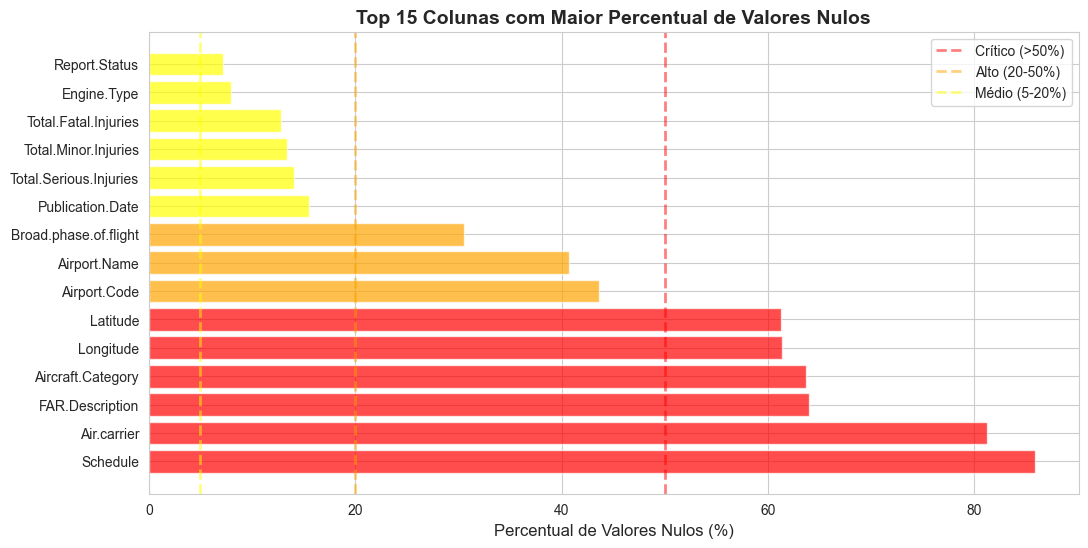

In [6]:
# Calcular estatísticas de valores nulos
missing_data = pd.DataFrame({
    'Coluna': df_raw.columns,
    'Qtd_Nulos': df_raw.isnull().sum().values,
    'Perc_Nulos': (df_raw.isnull().sum().values / len(df_raw) * 100).round(2)
})

# Ordenar por percentual de nulos
missing_data = missing_data.sort_values('Perc_Nulos', ascending=False)

# Exibir apenas colunas com valores nulos

colunas_com_nulos = missing_data[missing_data['Qtd_Nulos'] > 0]

# Resumo geral
total_cells = len(df_raw) * len(df_raw.columns)
total_nulls = df_raw.isnull().sum().sum()
completude_geral = ((total_cells - total_nulls) / total_cells * 100)

top_missing = colunas_com_nulos.head(15)
colors = ['red' if x > 50 else 'orange' if x > 20 else 'yellow' if x > 5 else 'lightgreen' 
          for x in top_missing['Perc_Nulos']]

plt.title('Top 15 Colunas com Maior Percentual de Valores Nulos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Percentual de Valores Nulos (%)', fontsize=12)
plt.barh(top_missing['Coluna'], top_missing['Perc_Nulos'], color=colors, alpha=0.7)
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Crítico (>50%)')
plt.axvline(x=20, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Alto (20-50%)')
plt.axvline(x=5, color='yellow', linestyle='--', linewidth=2, alpha=0.5, label='Médio (5-20%)')
plt.legend()


plt.show()

# Análise Temporal
## Objetivo: Entender a distribuição dos eventos ao longo do tempo

O gráfico a sseguir,mostra a quantidade de eventos (acidentes) por décadas, para melhor análise, fofi utilizado um gráfico de dispersão com regressão linear, com ele é possível identificar que os acidentes tem diminuído ao longo dos anos e que os eventos não acontecem de forma linear por não acompanharem fielmente a reta da regressão, a prova disso é a rápida crescente de eventos entre 1980 e 1990.

Text(0, 0.5, 'Número de Eventos')

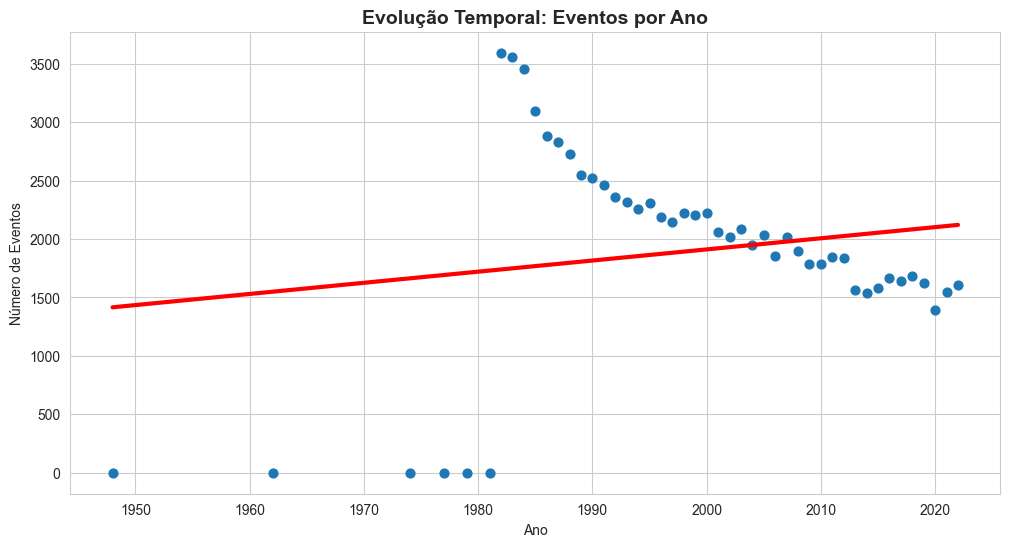

In [7]:
# Converte object para datetime 
temp_date = pd.to_datetime(df_raw['Event.Date'], errors='coerce')

# Extrair componentes temporais 
temp_year = temp_date.dt.year
temp_month = temp_date.dt.month
temp_decade = (temp_year // 10) * 10

events_by_year = temp_year.value_counts().sort_index()



# Reta de regressão 
x = events_by_year.index.values      # anos
y = events_by_year.values            # número de eventos
a, b = np.polyfit(events_by_year.index, events_by_year.values, 1)   # y = a*x + b
y_reta = a * x + b
plt.plot(
    x,
    y_reta,
    linewidth=3,
    label='Regressão Linear',
    color='red'
)

# Gráfico de dispersão
plt.scatter(
    events_by_year.index,
    events_by_year,          
    marker='o',              
    s=40,                   
    alpha=1
)
plt.title('Evolução Temporal: Eventos por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Número de Eventos')


Event.Date
1      4985
2      5285
3      6686
4      7248
5      8514
6      9561
7     10698
8      9986
9      8346
10     6982
11     5538
12     5060
Name: count, dtype: int64


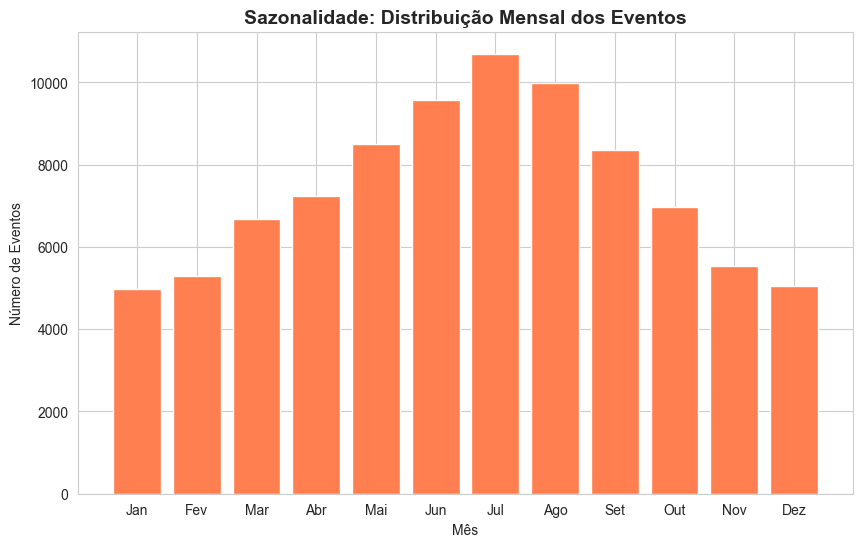

In [31]:
import matplotlib.pyplot as plt

# Supondo que month_dist seja uma Series com índices 1 a 12
month_dist = temp_month.value_counts().sort_index()
print(month_dist)
month_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.figure(figsize=(10,6))
plt.bar(month_names, month_dist.values, color='coral')
plt.title('Sazonalidade: Distribuição Mensal dos Eventos', 
          fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Número de Eventos')
plt.show()


In [62]:
# Converter data
df_raw['Event.Date'] = pd.to_datetime(df_raw['Event.Date'], errors='coerce')

# Extrair mês e ano
df_raw['Mes'] = df_raw['Event.Date'].dt.month
df_raw['Ano'] = df_raw['Event.Date'].dt.year
df_raw['Nome_Mes'] = df_raw['Event.Date'].dt.month_name()

# Remover linhas sem data
df = df_raw.dropna(subset=['Event.Date'])

In [63]:
# Contar acidentes por mês e ano
df_mensal = df.groupby(['Ano', 'Mes']).size().reset_index(name='Quantidade')

# Adicionar nome do mês
meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
df_mensal['Nome_Mes'] = df_mensal['Mes'].map(meses)

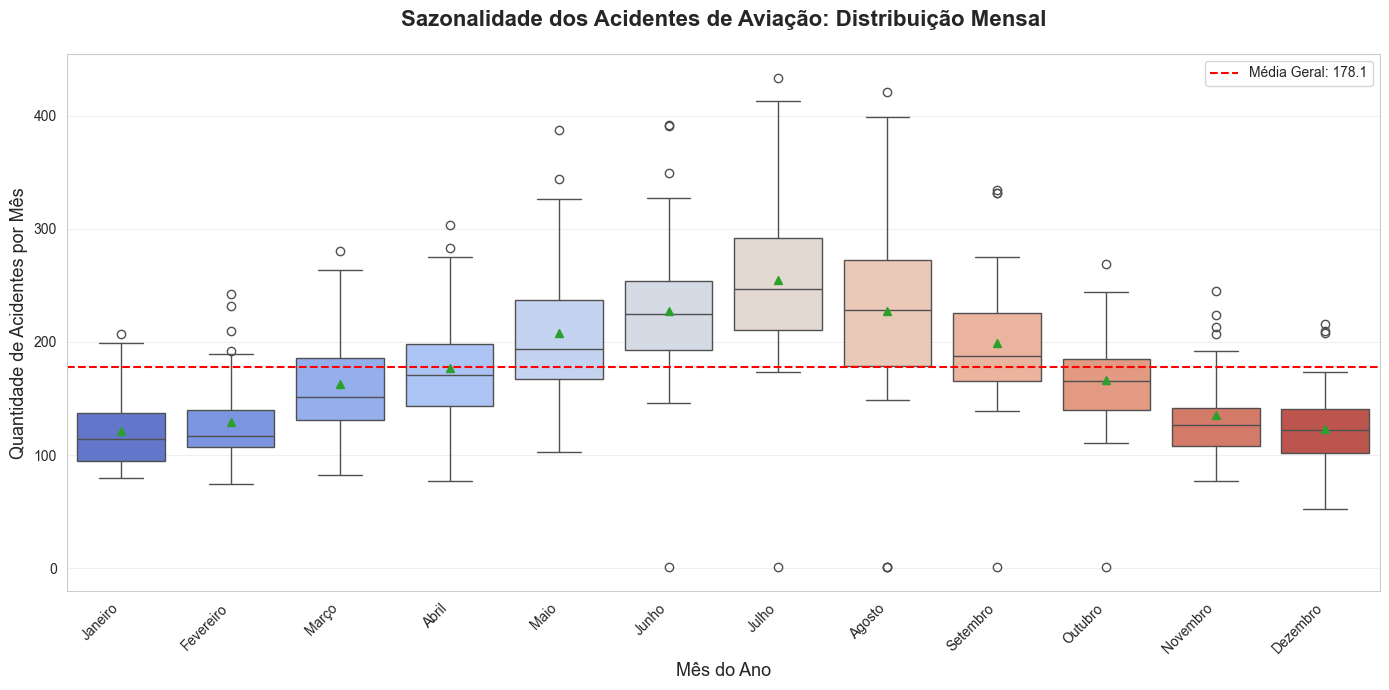

In [64]:
# Criar o box plot
plt.figure(figsize=(14, 7))

# Ordenar os meses corretamente
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

sns.boxplot(
    data=df_mensal,
    x='Nome_Mes',
    y='Quantidade',
    order=ordem_meses,
    palette='coolwarm',
    showmeans=True
)

# Títulos e legendas
plt.title('Sazonalidade dos Acidentes de Aviação: Distribuição Mensal',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês do Ano', fontsize=13)
plt.ylabel('Quantidade de Acidentes por Mês', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Adicionar linha horizontal com a média geral
media_geral = df_mensal['Quantidade'].mean()

plt.axhline(media_geral, color='red', linestyle='--', linewidth=1.5,
            label=f'Média Geral: {media_geral:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

   • Total.Fatal.Injuries: 50,201
   • Total.Serious.Injuries: 21,377
   • Total.Minor.Injuries: 27,478
   • Total.Uninjured: 441,889


Text(0.5, 1.0, 'Distribuição por Severidade de Lesões')

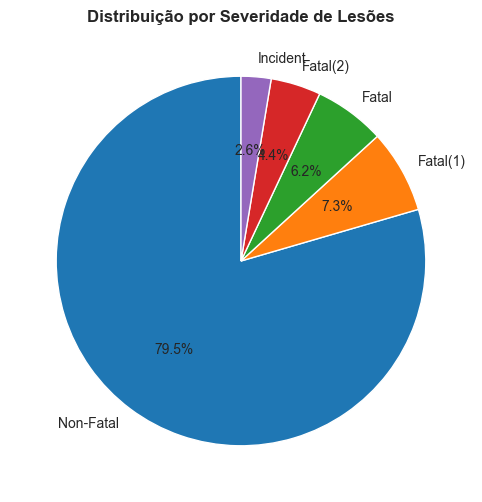

In [9]:

# Estatísticas de severidade dos eventos
severity_dist = df_raw['Injury.Severity'].value_counts()


# Danos à aeronave
damage_dist = df_raw['Aircraft.damage'].value_counts()

# Estatísticas de vítimas
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured']

for col in injury_cols:
    total = df_raw[col].sum()
    print(f"   • {col}: {total:,.0f}")

# Visualizações

# Gráfico 1: Severidade de lesões
plt.pie(severity_dist.head(5).values, labels=severity_dist.head(5).index, 
               autopct='%1.1f%%', startangle=90)
plt.title('Distribuição por Severidade de Lesões', fontweight='bold')


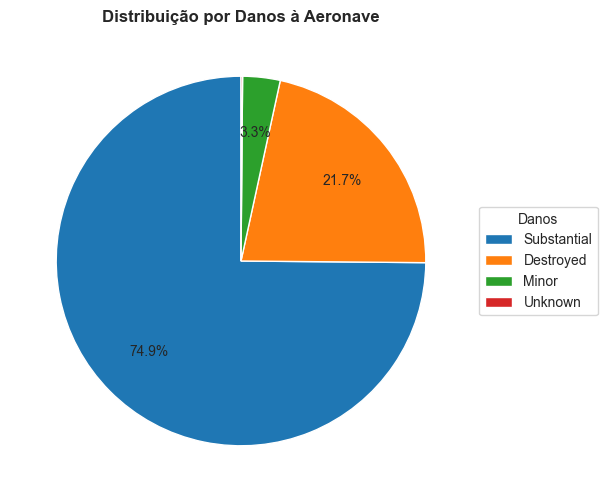

In [26]:
wedges, texts, autotexts = plt.pie(
    damage_dist.head(5).values,
    autopct=lambda pct: f'{pct:.1f}%' if pct >= 3 else '',
    startangle=90,
    pctdistance=0.7
)

plt.legend(
    wedges,
    damage_dist.head(5).index,
    title='Danos',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

plt.title('Distribuição por Danos à Aeronave', fontweight='bold')
plt.show()




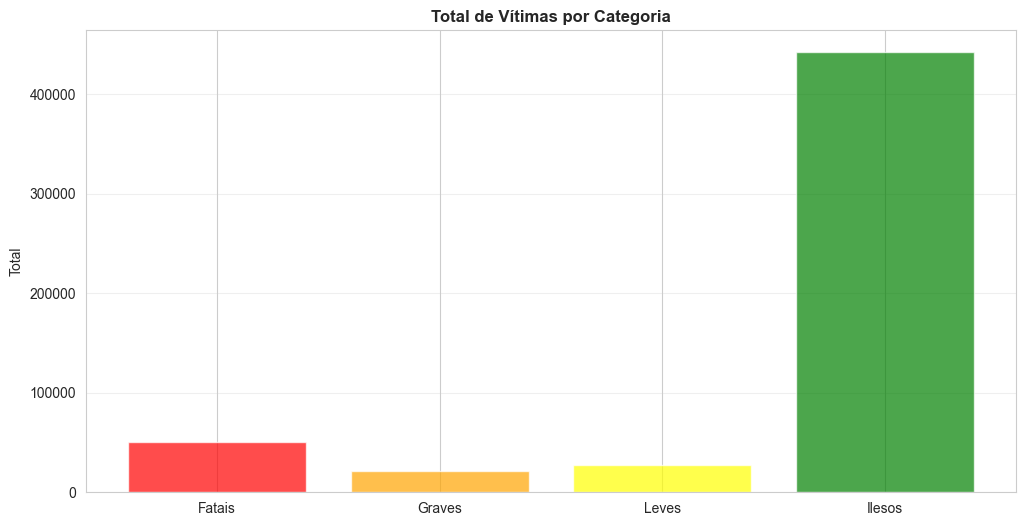

In [11]:

# Gráfico 3: Total de vítimas por categoria
injuries_summary = pd.DataFrame({
    'Categoria': ['Fatais', 'Graves', 'Leves', 'Ilesos'],
    'Total': [
        df_raw['Total.Fatal.Injuries'].sum(),
        df_raw['Total.Serious.Injuries'].sum(),
        df_raw['Total.Minor.Injuries'].sum(),
        df_raw['Total.Uninjured'].sum()
    ]
})
plt.bar(injuries_summary['Categoria'], injuries_summary['Total'], 
               color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
plt.title('Total de Vítimas por Categoria', fontweight='bold')
plt.ylabel('Total')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=0.3, axis='y')


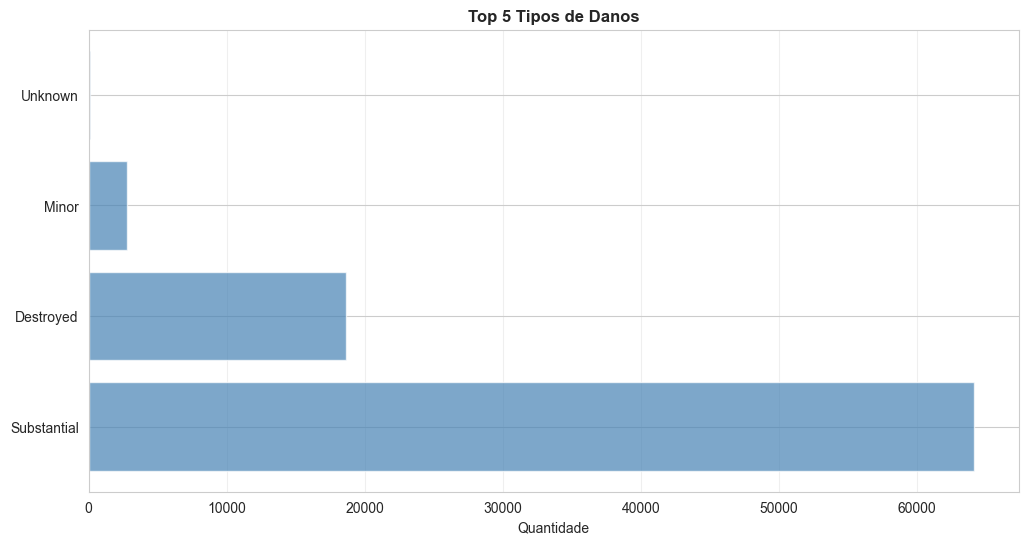

In [12]:

# Gráfico 4: Danos à aeronave (barras)
plt.barh(damage_dist.head(5).index, damage_dist.head(5).values, 
                color='steelblue', alpha=0.7)
plt.title('Top 5 Tipos de Danos', fontweight='bold')
plt.xlabel('Quantidade')
plt.grid(True, alpha=0.3, axis='x')

plt.show()



# ANÁLISE GEOGRÁFICA

Análise da Distribuição Geográfica dos Eventos
Objetivo: Entender onde os eventos ocorrem com mais frequência

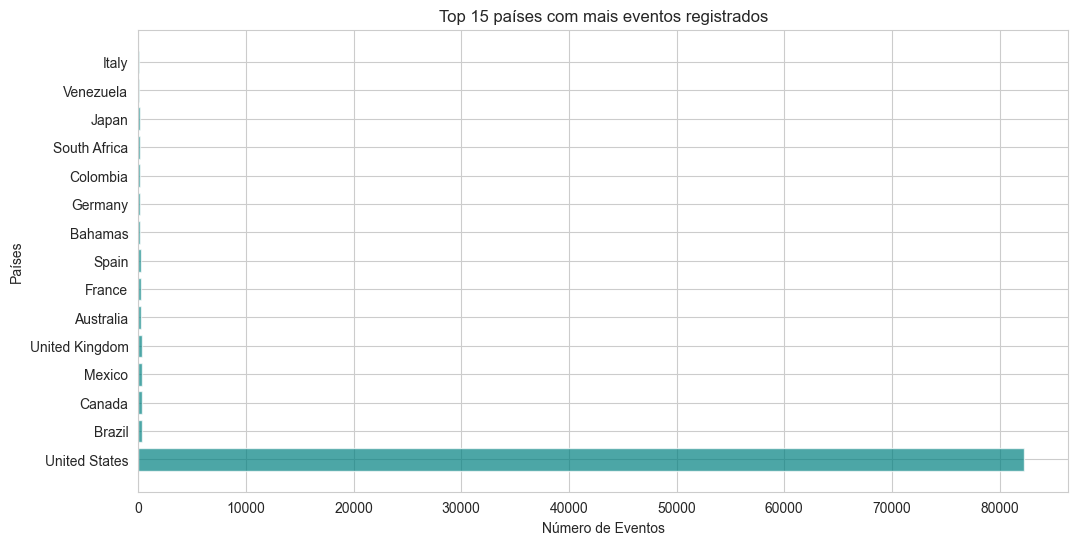

In [13]:

#histograma (série) dos 15 países com mais eventos
top_countries = df_raw['Country'].value_counts().head(15)

# Gráfico 1: Top 15 países com mais eventos
plt.barh(top_countries.index , top_countries.values, color='teal', alpha=0.7)
plt.title('Top 15 países com mais eventos registrados')
plt.xlabel('Número de Eventos')
plt.ylabel('Países')
plt.show()

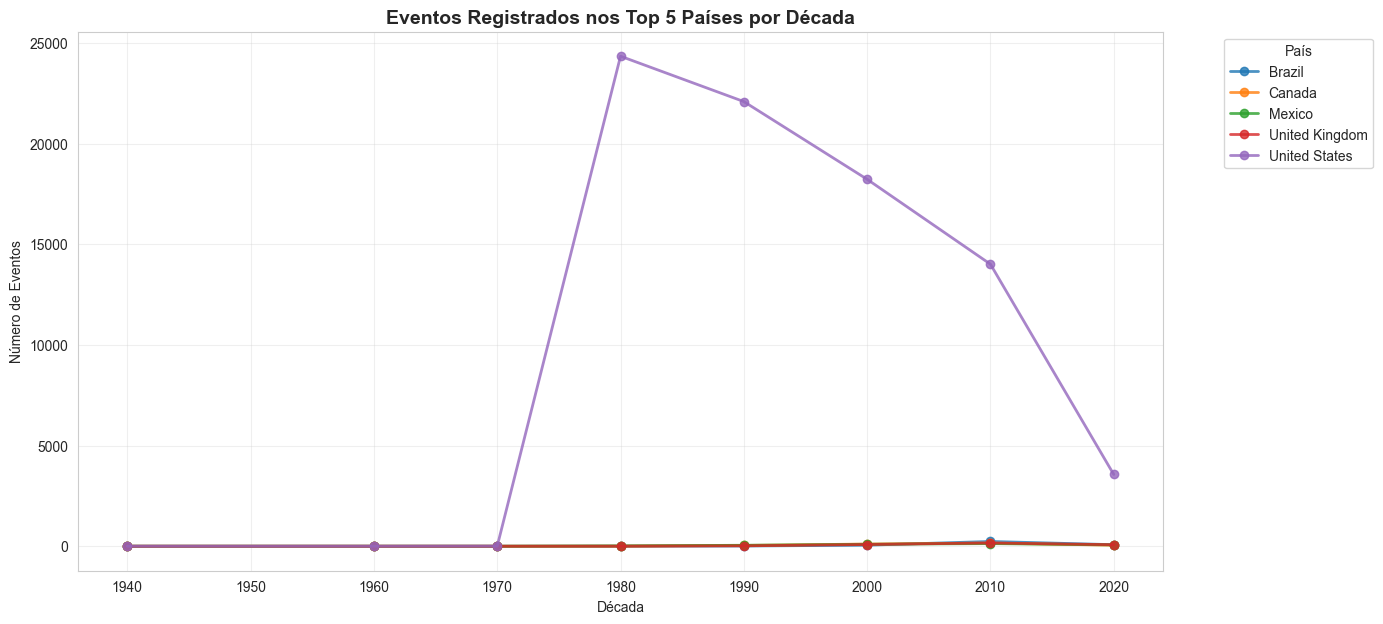

In [14]:
# Converter data e criar década
df_raw['Event.Date'] = pd.to_datetime(df_raw['Event.Date'], errors='coerce')
df_raw['Decade'] = (df_raw['Event.Date'].dt.year // 10) * 10

# Top 5 países com mais eventos
top_countries = df_raw['Country'].value_counts().head(5).index

# Retornar somentes os países do top 5
df_top = df_raw[df_raw['Country'].isin(top_countries)]

# Agrupar por Década e País
decade_top_countries = df_top.groupby(['Decade', 'Country']).size().unstack(fill_value=0)


decade_top_countries.plot(
    figsize=(14,7),
    marker='o',       
    linewidth=2,      
    alpha=0.8         
)

plt.title('Eventos Registrados nos Top 5 Países por Década', fontsize=14, fontweight='bold')
plt.xlabel('Década')
plt.ylabel('Número de Eventos')
plt.grid(True, alpha=0.3)
plt.legend(title='País', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

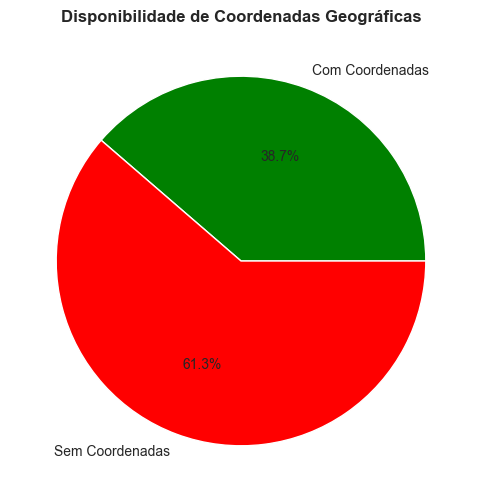

In [15]:
# # Análise de coordenadas
has_coords = df_raw['Latitude'].notna() & df_raw['Longitude'].notna() # pega somente os dados que tiverem latitude E longitude não nulos
no_has_coords = (~has_coords).sum() 

# Gráfico 2: Disponibilidade de coordenadas
coord_data = pd.DataFrame({
    'Categoria': ['Com Coordenadas', 'Sem Coordenadas'],
    'Quantidade': [has_coords.sum(), (~has_coords).sum()]
})
plt.pie(coord_data['Quantidade'], labels=coord_data['Categoria'], 
            autopct='%1.1f%%', colors=['green', 'red'])

plt.title('Disponibilidade de Coordenadas Geográficas', fontweight='bold')
plt.show()

# ANÁLISE DE AERONAVES

Análise das Características das Aeronaves Envolvidas
Objetivo: Entender perfil das aeronaves nos eventos

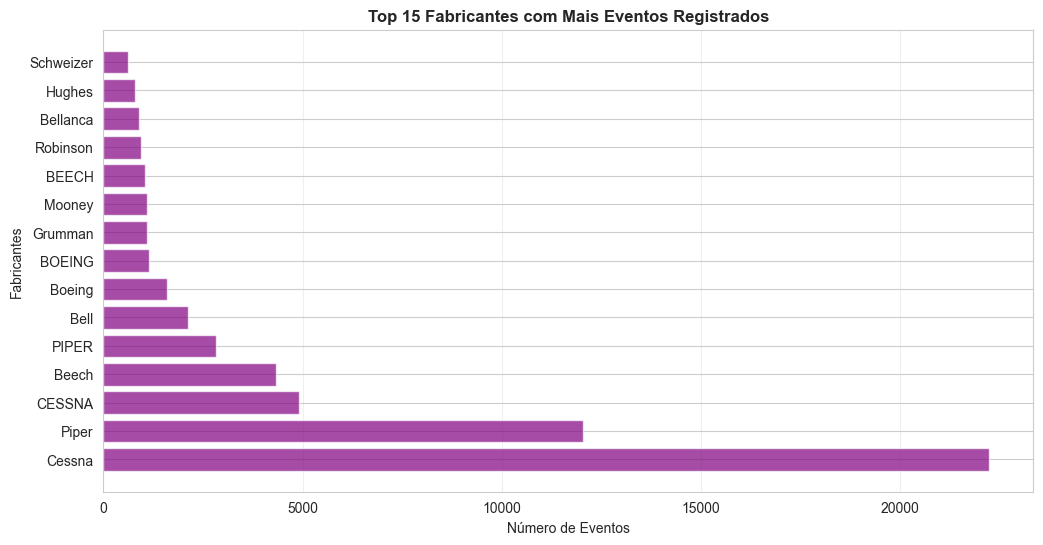

In [16]:
# Top fabricantes
top_makes = df_raw['Make'].value_counts().head(15)

# Gráfico 1: Top 15 fabricantes
plt.barh(top_makes.index , top_makes.values, color='purple', alpha=0.7)
plt.grid(True, alpha=0.3, axis='x')
plt.title('Top 15 Fabricantes com Mais Eventos Registrados', fontweight='bold')
plt.xlabel('Número de Eventos')
plt.ylabel('Fabricantes')
plt.show()

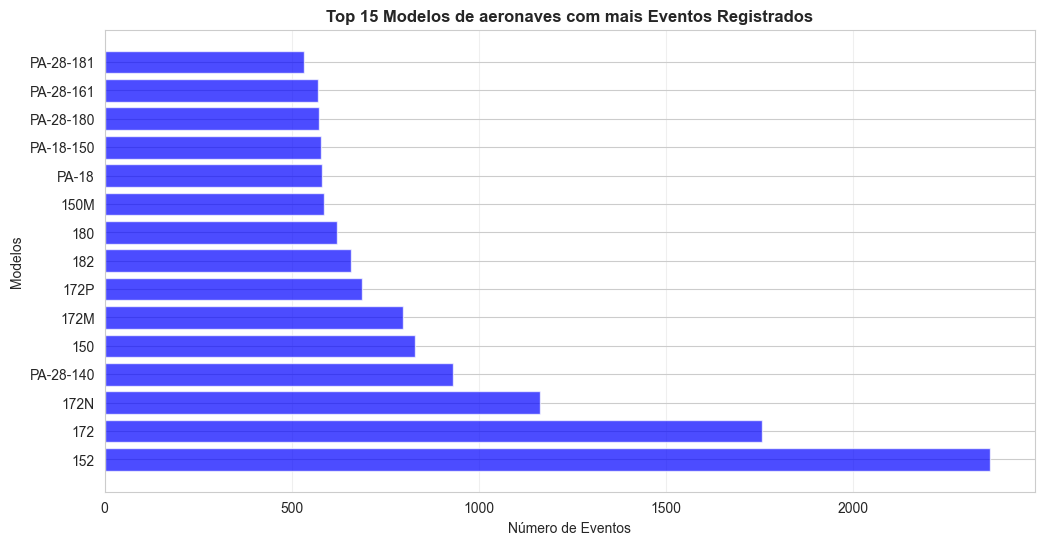

In [17]:

# Top modelos
top_models = df_raw['Model'].value_counts().head(15)

# Gráfico 2: Top 15 Modelos
plt.barh(top_models.index , top_models.values, color='blue', alpha=0.7)
plt.grid(True, alpha=0.3, axis='x')
plt.title('Top 15 Modelos de aeronaves com mais Eventos Registrados', fontweight='bold')
plt.xlabel('Número de Eventos')
plt.ylabel('Modelos')
plt.show()

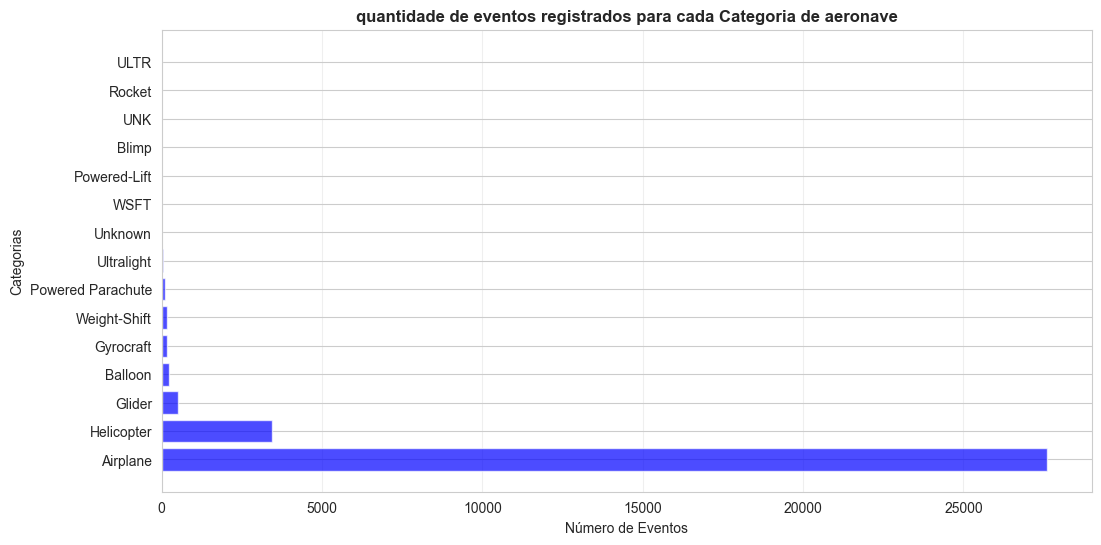

In [18]:

# Categorias de aeronave
category_dist = df_raw['Aircraft.Category'].value_counts()

# Gráfico 3: Categorias em relação aos eventos
plt.barh(category_dist.index , category_dist.values, color='blue', alpha=0.7)
plt.grid(True, alpha=0.3, axis='x')
plt.title('quantidade de eventos registrados para cada Categoria de aeronave', fontweight='bold')
plt.xlabel('Número de Eventos')
plt.ylabel('Categorias')
plt.show()


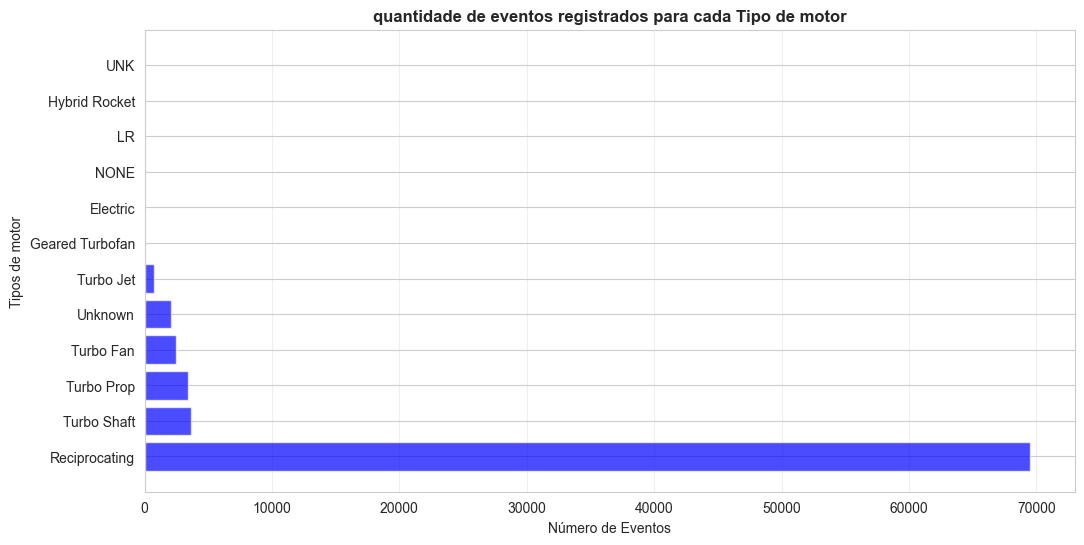

In [19]:
# # Tipo de motor
engine_dist = df_raw['Engine.Type'].value_counts()

# Gráfico 4: Tipos de motor em relação aos eventos
plt.barh(engine_dist.index , engine_dist.values, color='blue', alpha=0.7)
plt.grid(True, alpha=0.3, axis='x')
plt.title('quantidade de eventos registrados para cada Tipo de motor', fontweight='bold')
plt.xlabel('Número de Eventos')
plt.ylabel('Tipos de motor')
plt.show()




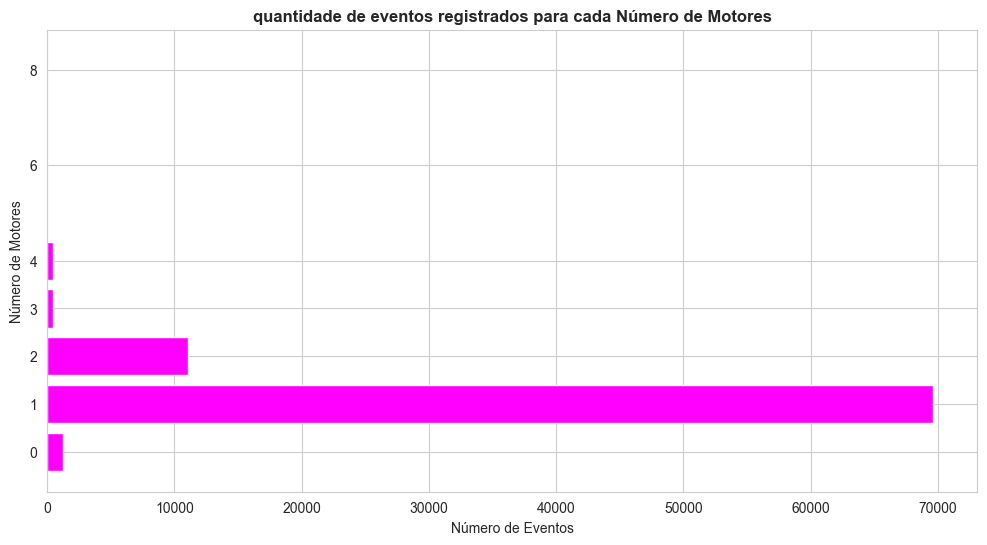

In [20]:
# Número de motores
num_engines = df_raw['Number.of.Engines'].value_counts().sort_index()

# Gráfico 5: Número de motores em relação aos eventos
plt.barh(num_engines.index, num_engines.values,color='magenta')
plt.title('quantidade de eventos registrados para cada Número de Motores', fontweight='bold')
plt.xlabel('Número de Eventos')
plt.ylabel('Número de Motores')
plt.yticks(num_engines.index)
plt.show()

Amateur.Built
No     80312
Yes     8475
Name: count, dtype: int64


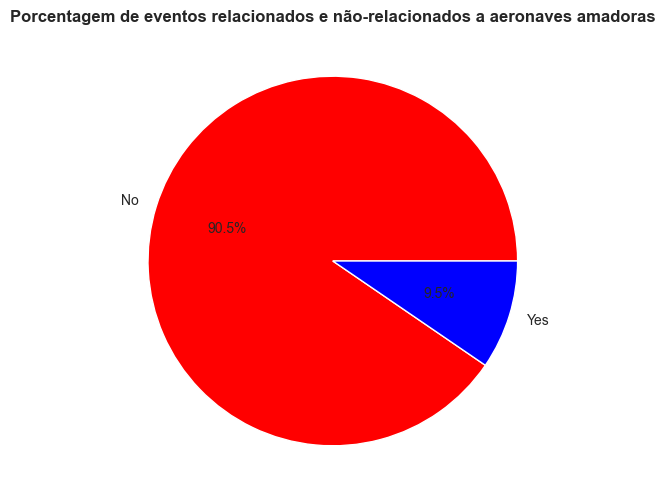

In [21]:
# Aeronaves amadoras
amateur_dist = df_raw['Amateur.Built'].value_counts()
print(amateur_dist)


# Gráfico 6: Aeronaves Construídas por Amadores
plt.pie(
    amateur_dist.values,       # valores das fatias
    labels=amateur_dist.index, # nomes das fatias
    autopct='%1.1f%%',              # mostrar porcentagem dentro da fatia
    colors=['red', 'blue'], # cores das fatias
)

plt.title('Porcentagem de eventos relacionados e não-relacionados a aeronaves amadoras', fontweight='bold')
plt.show()


# ANÁLISE DE FASES DE VOO

Análise das Fases de Voo Durante os Eventos
Objetivo: Identificar em que momento do voo os eventos ocorrem


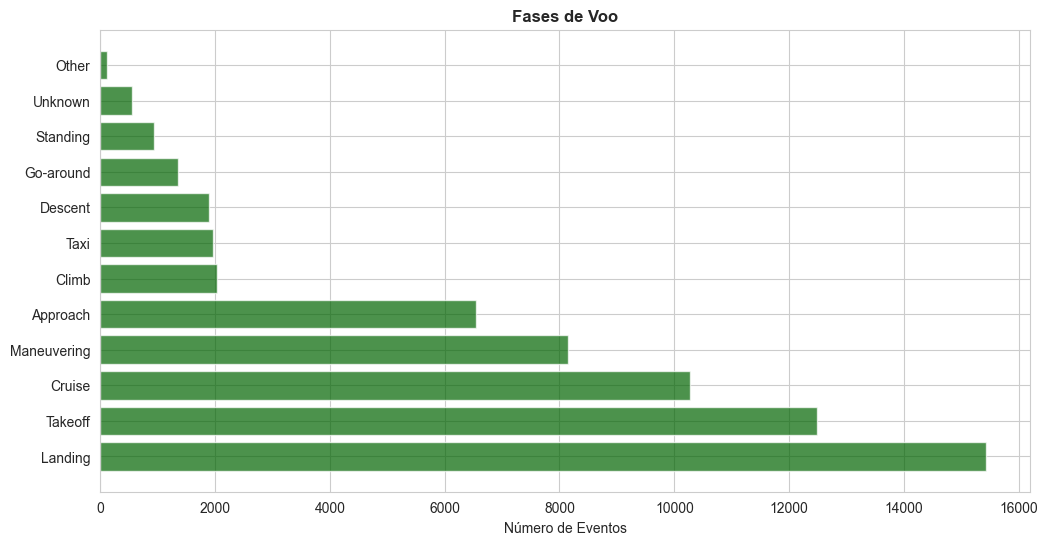

In [22]:
# Distribuição por fase de voo
phase_dist = df_raw['Broad.phase.of.flight'].value_counts()

# Gráfico 1: Fases de voo
plt.barh(phase_dist.index, phase_dist.values, color='darkgreen', alpha=0.7)
plt.yticks()
plt.xlabel('Número de Eventos')
plt.title('Fases de Voo', fontweight='bold')
plt.show()


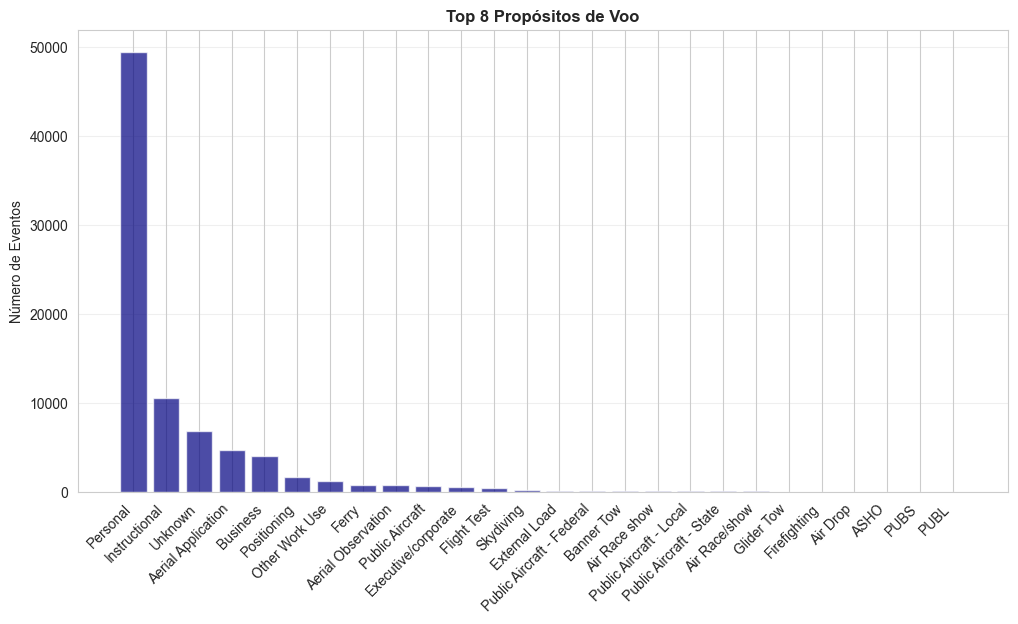

In [23]:

# Propósito do voo
purpose_dist = df_raw['Purpose.of.flight'].value_counts()
# Gráfico 2: Propósito do voo
plt.bar(purpose_dist.index, purpose_dist.values, 
               color='navy', alpha=0.7)
plt.xticks(purpose_dist.index, rotation=45, ha='right')
plt.ylabel('Número de Eventos')
plt.title('Top 8 Propósitos de Voo', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')


Weather.Condition
VMC    77303
IMC     5976
UNK      856
Unk      262
Name: count, dtype: int64


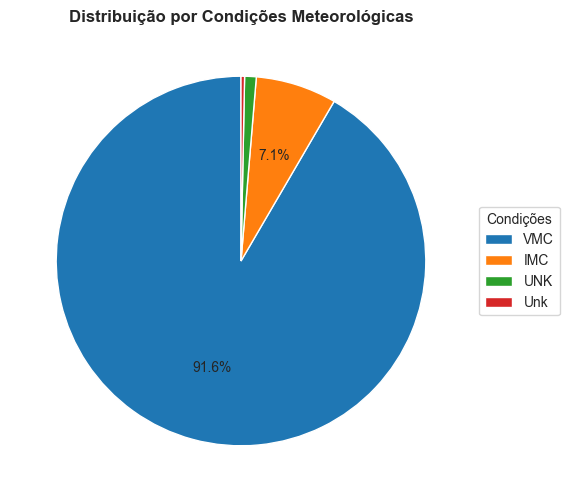

In [24]:

# Condições meteorológicas
weather_dist = df_raw['Weather.Condition'].value_counts()

print(weather_dist)
# Gráfico 3: Condições meteorológicas
wedges, texts, autotexts = plt.pie(weather_dist.values, 
      autopct=lambda pct: f'{pct:.1f}%' if pct >= 3 else '', startangle=90)
plt.title('Distribuição por Condições Meteorológicas', fontweight='bold')


plt.legend(
    wedges,
    weather_dist.index,
    title='Condições',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

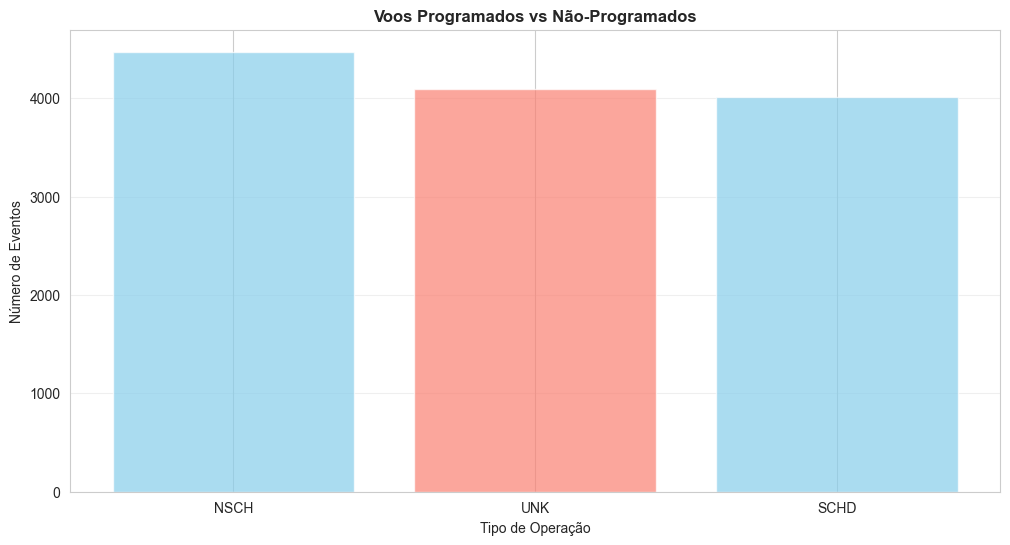

In [25]:
# Tipo de operação (Schedule)
schedule_dist = df_raw['Schedule'].value_counts()

# Gráfico 4: Tipo de operação
plt.bar(schedule_dist.index, schedule_dist.values, 
               color=['skyblue', 'salmon'], alpha=0.7)
plt.xlabel('Tipo de Operação')
plt.ylabel('Número de Eventos')
plt.title('Voos Programados vs Não-Programados', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')


# Conclusão

### 1. VOLUME E ESTRUTURA DOS DADOS
- Dataset com 88.889 registros de eventos aéreos
- 31 colunas com informações diversas
- Período histórico de várias décadas
- Tamanho: ~21 MB em memória

### 2. QUALIDADE DOS DADOS
- Completude geral: ~70-80%
- Campos críticos com muitos nulos:
  - Aircraft.Category: ~64% nulos
  - Latitude/Longitude: ~61% nulos
  - Airport.Code/Name: ~40-44% nulos
- Campos essenciais bem preenchidos:
  - Make/Model: >99% completos
  - Event.Date: 100% completo
  - Country/Location: >99% completos

### 3. PROBLEMAS IDENTIFICADOS (para correção no ETL)
- Event.Date está como 'object' → converter para datetime
- Latitude/Longitude estão como 'object' → converter para float
- Valores nulos em campos numéricos → tratar adequadamente
- Inconsistências em categorias → padronizar

### 4. PADRÕES IDENTIFICADOS

#### Temporal
- Dados de múltiplas décadas
- Possível tendência de redução em anos recentes
- Sazonalidade mensal observada

#### Geográfico
- Predominância de eventos nos Estados Unidos
- Boa distribuição geográfica global
- 61% sem coordenadas precisas

#### Aeronaves
- Cessna e Piper dominam as estatísticas
- Maioria são aeronaves monomotor
- Predominância de aviação geral (não comercial)

#### Severidade
- Maioria dos eventos são não-fatais
- Danos substanciais são mais comuns que destruição total
- Variedade de níveis de gravidade

#### Operacional
- Landing e Takeoff são fases mais críticas
- Maioria em condições meteorológicas visuais (VMC)
- Predominância de voos pessoais/recreativos

### 5. VIABILIDADE PARA MODELAGEM DIMENSIONAL

####  Dimensões viáveis
- dim_time (Event.Date 100% completo)
- dim_location (Country/Location >99% completos)
- dim_aircraft (Make/Model >99% completos)
- dim_weather (Weather.Condition ~93% completo)
- dim_severity (Injury/Damage ~95% completos)
- dim_flight_phase (Phase ~90% completo)

#### Fatos (Medidas)
- Total.Fatal.Injuries 
- Total.Serious.Injuries 
- Total.Minor.Injuries 
- Total.Uninjured 